# Adriann Liceralde
# Combine CSV - Binary

## Select Directory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

user = 'adria'
user = 'Adriann Liceralde'
subfolder = 'V 2.2.1'
os.chdir('C:\\Users\\'+str(user)+'\\Desktop\\Repository\\WirelessSensorNetwork\\Data\\'
         + str(subfolder))
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

## Process Binary Data

In [2]:
allUnixTime = np.array([])
allWindSpeed= np.array([])
allWindDir  = np.array([])
allGasData  = np.array([])

for each in all_filenames:
    f = open(each, "rb")
    filesize   = int(os.path.getsize(each))
    headersize = 0
    lines      = (filesize-headersize)//8

    print('File :' , each, '\n', 'Bytes:' , filesize, '\n', 'Lines:' , lines)
    first = False
    counter = 0
    
    for i in range(lines):
        if (first == False) and headersize > 0:
            filler = str(f.read(headersize), 'utf-8')
            first  = True
        unix = int.from_bytes(f.read(4), byteorder='big')
        ws   = int.from_bytes(f.read(1), byteorder='big')
        wd   = int.from_bytes(f.read(1), byteorder='big')
        gas  = int.from_bytes(f.read(2), byteorder='big')
        allUnixTime = np.append(allUnixTime, str(unix))
        allWindSpeed= np.append(allWindSpeed, ws)
        allWindDir  = np.append(allWindDir,  wd)
        allGasData  = np.append(allGasData, gas)

File : 2020-07-13--19.csv 
 Bytes: 3200 
 Lines: 400


## Export to Single CSV

In [3]:
allWindDir   *= 22.5
allWindSpeed *= 1.492
CombineNP = np.column_stack((allUnixTime, allWindSpeed, allWindDir, allGasData))
CombineDF = pd.DataFrame(CombineNP)
CombineDF.columns  = ['UnixTime', 'Wind Speed', 'Wind Dir', 'GasData']
CombineDF.UnixTime = CombineDF.UnixTime.astype(int)

name = 'C-'+ str(all_filenames[0])[0:-8] + str('.csv')
CombineDF.to_csv(name, index=False, encoding='utf-8-sig')

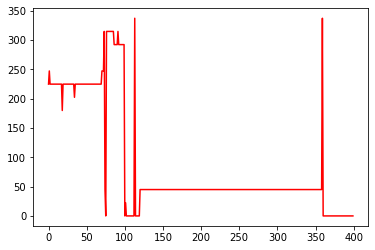

In [4]:
plt.plot(allWindDir, 'r')
plt.show()

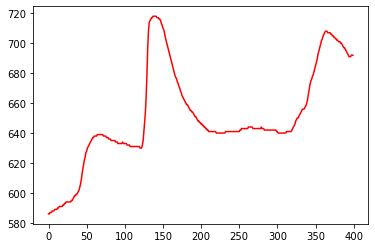

In [5]:
plt.plot(allGasData, 'r')
plt.show()

[]

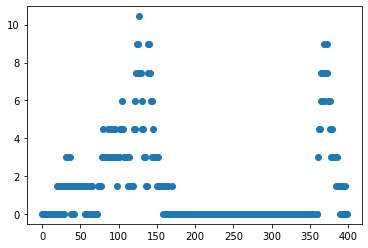

In [7]:
plt.plot(allWindSpeed[0:-1], 'o')
plt.plot()